# Apple App Store Analysis

### With this analysis, I'm looking at the total number of applications on the Apple App Store and seeing if there's any correlation between applications with the highest total user ratings. I'll be using the total number of user ratings to gauge app popularity since there's no information on downloads per application, and it's the next best thing. I'll also be looking at the most popular categories for applications to get an idea of genre-wise characteristics that make an app successful. 

Here is where I will import Pandas, Numpy, Matplotlib, and Seaborn for graphing our data.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Below is where the file is imported and read so we can extract the data.

In [3]:
data = pd.read_csv('AppleStore.csv')
opened_file = open('AppleStore.csv')
from csv import reader

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


We can see from the information above that there are 7,197 entries and 17 different columns for information about the apps. 

##### When using **data.describe()**, we can see the mean for the applications in terms of price and the minimum and maximum price for an app. 
The minimum amount is $0 for the app, and the highest is $299.99. We also see the mean for user ratings between all apps is 3.52/5.

In [9]:
data.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [37]:
print('1. The total number of free applications is: ' + str(sum(data.price == 0)))
print('2. The total number of paid applications is: ' + str(sum(data.price > 0.0)))

1. The total number of free applications is: 4056
2. The total number of paid applications is: 3141


In total, out of the 7,197 apps, there are 4,056 free apps and 3,141 paid apps. With this information, we can see that free apps are the most popular by a good amount in the Apple App Store.


##### The graph below shows the range in terms of price, the app count for said price, and overall price distribution. We can see that high spike in the $0 range since we know there are 4,056 free apps. The issue with this graph is that most of the applications are in that starting price range, so we can eliminate outliers to condense the chart and get a more accurate visual of the price distribution between the apps. To do this, we will only graph apps below $20 in price.

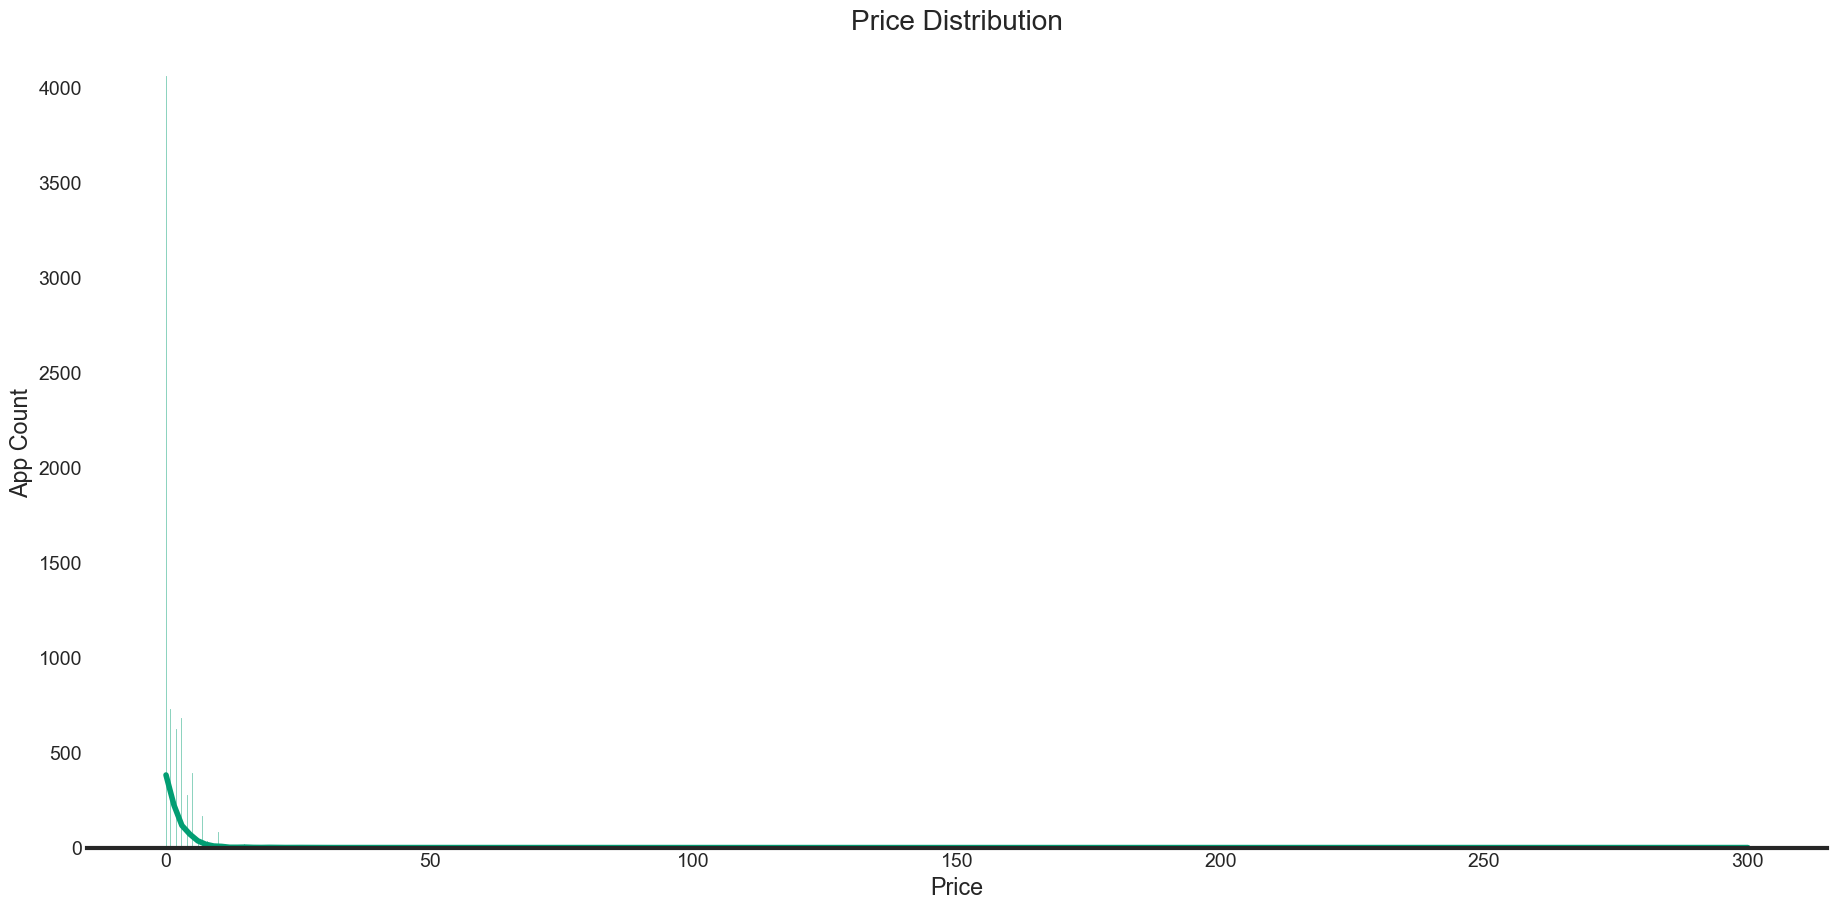

In [62]:
f, ax = plt.subplots(figsize=(20, 10))
#Check the new distribution 
sns.histplot(data['price'], color="g",kde=True);
ax.xaxis.grid(False) # False: remove grid along y-axis
ax.set(ylabel="App Count")
ax.set(xlabel="Price")
ax.set(title="Price Distribution")
sns.despine(left=True) # Do not show the left axis when left=True
plt.show()

##### As we can see below, when taking out applications worth $20 and more, we get a more condensed and accurate portrayal of our data. At that $0 mark lies most of the apps regarding price, but we can also see that almost all applications lie between $0-$10, with a flat line once we go past $10.

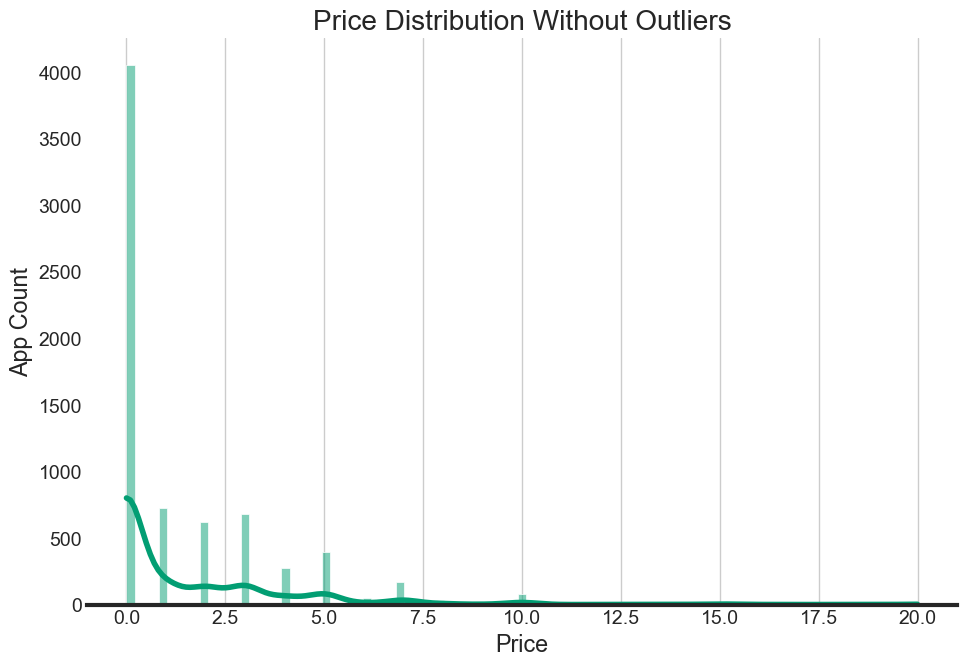

In [63]:
paid_data_no_outlier=data.loc[data['price']<20]
f, ax = plt.subplots(figsize=(10, 7))
sns.histplot(paid_data_no_outlier['price'], color="g",kde=True);
ax.xaxis.grid(True)
ax.set(ylabel="App Count")
ax.set(xlabel="Price")
ax.set(title="Price Distribution Without Outliers")
sns.despine(left=True)
plt.show()

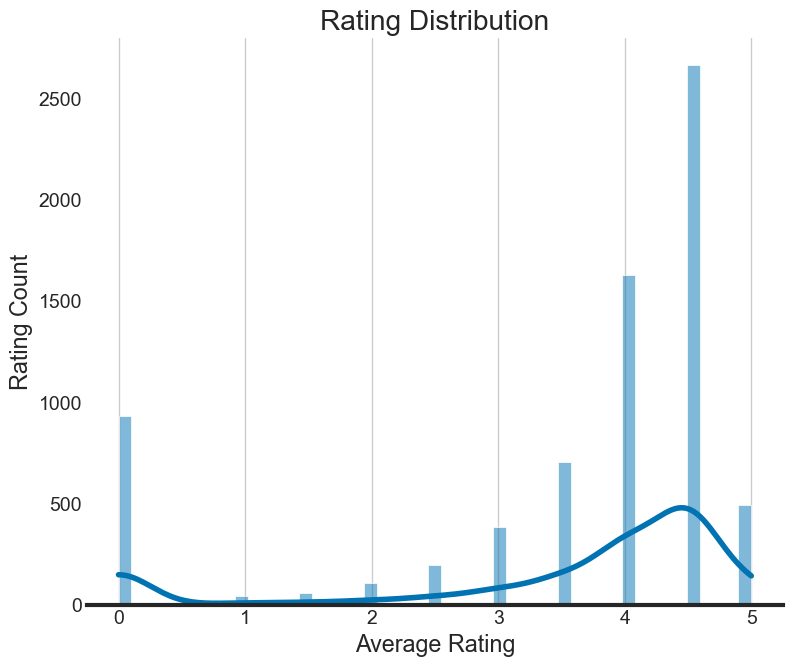

In [48]:
sns.set_style("white")
sns.set_color_codes(palette='colorblind')
f, ax = plt.subplots(figsize=(8, 7))
sns.histplot(data['user_rating'], color="b",kde=True);
ax.xaxis.grid(True)
ax.set(ylabel="Rating Count")
ax.set(xlabel="Average Rating")
ax.set(title="Rating Distribution")
sns.despine(left=True)
plt.show()



Above, we have a graph of the average rating of all apps. The top three ratings for apps are 4.5, 4, and 0. There's a bit of a disparity here as, yes, there's a good amount of apps that lie within that 4-4.5 rating, but the fact that the third highest amount of ratings is a 0/5 shows that there are quite a few apps on the Apple App Store that people deem as being almost useless. Whether it's from an application constantly crashing or from the app just not being of high quality is unknown since we don't get this specific information. Still, it's either one of the two which shows that having a functional app of the highest quality along with a helpful app is the key to success ratings-wise.

In [51]:
data.groupby('track_name')[['rating_count_tot']].mean().sort_values(['rating_count_tot'], ascending=False).head(50)

,rating_count_tot
track_name,
Facebook,2974676.0
Instagram,2161558.0
Clash of Clans,2130805.0
Temple Run,1724546.0
Pandora - Music & Radio,1126879.0
Pinterest,1061624.0
Bible,985920.0
Candy Crush Saga,961794.0
Spotify Music,878563.0


We get an idea here of the top 50 apps regarding popularity on the Apple App Store. Facebook is at the top, along with Instagram and Clash of Clans. Something to note is that this data is a bit outdated, so things have changed slightly, but there's still common apps such as these three mentioned that are still at the top. The aspect to note with these top apps on this list is that they're social networking apps, which are free, and there are a fair amount of games on the list. Some are free, and others you pay for. One thing that machine learning would need to be able to recognize is that these free gaming apps make their money off of microtransactions. This can come in the form of buying the currency the game uses or with battle passes. The lure is that the app is free, which hits the biggest target audience possible, then they get individuals paying to the point where they decide to spend money on the in-game currency or battle passes since they start putting in dozens of hours. They also feel the purchases are worth it since the game was initially free, which makes them feel as though this money they're spending is almost a tip since a lot of games are $60 on consoles, if not more sometimes.

In [52]:
data.groupby('prime_genre')[['rating_count_tot']].mean().sort_values(['rating_count_tot'], ascending=False)

,rating_count_tot
prime_genre,
Social Networking,45498.898204
Music,28842.021739
Reference,22410.843750
Weather,22181.027778
Shopping,18615.327869
Photo & Video,14352.280802
Travel,14129.444444
Sports,14026.929825
Food & Drink,13938.619048


Beyond looking at the app-store's top apps, I also wanted to look at the top genres. We have at the top, which probably isn't shocking to most **Social Networking** apps. This is your Instagram, Facebook, Twitter, etc. We then have music apps such as Spotify and the Reference category. This could be clearer, but the Reference category is apps such as **Wikipedia**, **Dictionary.com**, etc. This was surprising to me as I would've thought **Sports** or **Games** would be in the top three. There are a few games that carry the weight for the average amount of total ratings in the category, and there are a lot of gaming apps that don't do well, so where's it's at on the list, it makes a bit of sense.

My goal with this analysis was to be concise while also trying to extract a correlation between all of the apps in the Apple App Store and what traits the most successful apps have. Looking at the most popular categories for apps was also a part of the equation. We can have our finger on the pulse of consumers when it comes to applications on their phones to predict the most successful app if a company wants to make one. We saw that there are quite a bit more free apps than there are paid apps, and a benefit of this is that free apps lure customers in and get them using the app, such as with games like Clash of Clans, but they make their money, and a lot of it with in-game purchases like the games currency and battle passes. Clash of Clans is one of the few mobile games, for example, to pass $1 billion yearly revenue. Other free apps that make money off in-app purchases that aren't games are dating apps like Tinder. The reason there are more free apps than paid ones is that the app is entirely free, but once the user gets sucked into the app, there are in-app purchases waiting for them, which is where customers are financially successful. You also have free apps without in-app purchases that make good money off ads. Some apps will let the user get rid of these ads by paying a premium. In summary, a successful app is free, has in-app purchases, and is either in the category of **Social Networking** or **Games**. 